In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import joblib
import copy

In [2]:
import tensorflow as tf
from keras import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [18]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
# optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32, 32),
    batch_size=20000,
    class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(32, 32),
        batch_size=2500,
        class_mode='binary')

(x_train, y_train) = train_generator.next()
(x_test, y_test) = test_generator.next()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [20]:
super_duper_loss = []

In [21]:
super_duper_loss

[]

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20000, 32, 32, 3)
(20000,)
(2500, 32, 32, 3)
(2500,)


In [23]:
# model_1 = copy.deepcopy(model)
# model_2 = copy.deepcopy(model)

In [24]:
# model_1.fit(x_train, y_train, epochs=100, batch_size=100, verbose=1, validation_split=0.1)

In [25]:
# model_1.evaluate(x_test, y_test)

In [11]:
# x10 = copy.deepcopy(x_train.reshape(10, 2000, 32, 32, 3))
# y10 = copy.deepcopy(y_train.reshape(10, 2000))

# num_malisious = 1

In [33]:
x10 = copy.deepcopy(x_train.reshape(10, 2000, 32, 32, 3))
y10 = copy.deepcopy(y_train.reshape(10, 2000))

num_malisious = 1
for i in range(num_malisious):
    random.shuffle(y10[i])

In [34]:
y10[0]

array([1., 1., 0., ..., 0., 1., 1.], dtype=float32)

In [35]:
model_2 = copy.deepcopy(model)
weights = model_2.get_weights()
loss=[]
for i in range(10):
    model_2.set_weights(weights)
    history=model_2.fit(x10[i], y10[i], epochs=50, batch_size=100, verbose=1, validation_split=0.1)
    weights = model_2.get_weights()
    loss=loss+history.history['loss']

INFO:tensorflow:Assets written to: ram://142fae75-de0f-4f2e-9922-72f87c982fe1/assets


INFO:tensorflow:Assets written to: ram://142fae75-de0f-4f2e-9922-72f87c982fe1/assets


Epoch 1/50
18/18 [==============================] - 1s 41ms/step - loss: 1.0201 - accuracy: 0.5006 - val_loss: 0.6921 - val_accuracy: 0.5300
Epoch 2/50
18/18 [==============================] - 1s 36ms/step - loss: 0.9479 - accuracy: 0.5244 - val_loss: 0.6921 - val_accuracy: 0.5300
Epoch 3/50
18/18 [==============================] - 1s 35ms/step - loss: 0.9428 - accuracy: 0.5094 - val_loss: 0.6949 - val_accuracy: 0.5300
Epoch 4/50
18/18 [==============================] - 1s 36ms/step - loss: 0.9094 - accuracy: 0.5283 - val_loss: 0.6957 - val_accuracy: 0.5300
Epoch 5/50
18/18 [==============================] - 1s 37ms/step - loss: 0.8907 - accuracy: 0.5211 - val_loss: 0.6945 - val_accuracy: 0.5300
Epoch 6/50
18/18 [==============================] - 1s 37ms/step - loss: 0.8785 - accuracy: 0.5117 - val_loss: 0.6950 - val_accuracy: 0.5350
Epoch 7/50
18/18 [==============================] - 1s 36ms/step - loss: 0.8048 - accuracy: 0.5544 - val_loss: 0.6952 - val_accuracy: 0.5300
Epoch 8/50
18

Epoch 9/50
18/18 [==============================] - 1s 35ms/step - loss: 0.6644 - accuracy: 0.5861 - val_loss: 0.6363 - val_accuracy: 0.6100
Epoch 10/50
18/18 [==============================] - 1s 36ms/step - loss: 0.6474 - accuracy: 0.6250 - val_loss: 0.6376 - val_accuracy: 0.6100
Epoch 11/50
18/18 [==============================] - 1s 34ms/step - loss: 0.6535 - accuracy: 0.6244 - val_loss: 0.6376 - val_accuracy: 0.6150
Epoch 12/50
18/18 [==============================] - 1s 34ms/step - loss: 0.6499 - accuracy: 0.6167 - val_loss: 0.6418 - val_accuracy: 0.6050
Epoch 13/50
18/18 [==============================] - 1s 35ms/step - loss: 0.6380 - accuracy: 0.6178 - val_loss: 0.6572 - val_accuracy: 0.6300
Epoch 14/50
18/18 [==============================] - 1s 34ms/step - loss: 0.6432 - accuracy: 0.6250 - val_loss: 0.6434 - val_accuracy: 0.6200
Epoch 15/50
18/18 [==============================] - 1s 36ms/step - loss: 0.6487 - accuracy: 0.6244 - val_loss: 0.6428 - val_accuracy: 0.6100
Epoch 1

Epoch 17/50
18/18 [==============================] - 1s 35ms/step - loss: 0.5969 - accuracy: 0.6767 - val_loss: 0.6308 - val_accuracy: 0.6600
Epoch 18/50
18/18 [==============================] - 1s 34ms/step - loss: 0.6043 - accuracy: 0.6756 - val_loss: 0.6332 - val_accuracy: 0.6450
Epoch 19/50
18/18 [==============================] - 1s 36ms/step - loss: 0.5980 - accuracy: 0.6783 - val_loss: 0.6603 - val_accuracy: 0.6550
Epoch 20/50
18/18 [==============================] - 1s 37ms/step - loss: 0.5979 - accuracy: 0.6761 - val_loss: 0.6309 - val_accuracy: 0.6500
Epoch 21/50
18/18 [==============================] - 1s 35ms/step - loss: 0.5798 - accuracy: 0.6917 - val_loss: 0.6420 - val_accuracy: 0.6500
Epoch 22/50
18/18 [==============================] - 1s 34ms/step - loss: 0.5877 - accuracy: 0.6856 - val_loss: 0.6295 - val_accuracy: 0.6350
Epoch 23/50
18/18 [==============================] - 1s 34ms/step - loss: 0.5977 - accuracy: 0.6750 - val_loss: 0.6332 - val_accuracy: 0.6700
Epoch 

Epoch 25/50
18/18 [==============================] - 1s 35ms/step - loss: 0.5348 - accuracy: 0.7383 - val_loss: 0.5379 - val_accuracy: 0.6850
Epoch 26/50
18/18 [==============================] - 1s 34ms/step - loss: 0.5372 - accuracy: 0.7294 - val_loss: 0.5387 - val_accuracy: 0.6800
Epoch 27/50
18/18 [==============================] - 1s 35ms/step - loss: 0.5196 - accuracy: 0.7428 - val_loss: 0.5332 - val_accuracy: 0.7050
Epoch 28/50
18/18 [==============================] - 1s 34ms/step - loss: 0.5230 - accuracy: 0.7394 - val_loss: 0.5548 - val_accuracy: 0.7500
Epoch 29/50
18/18 [==============================] - 1s 35ms/step - loss: 0.5379 - accuracy: 0.7361 - val_loss: 0.5442 - val_accuracy: 0.7450
Epoch 30/50
18/18 [==============================] - 1s 35ms/step - loss: 0.5241 - accuracy: 0.7333 - val_loss: 0.5827 - val_accuracy: 0.6450
Epoch 31/50
18/18 [==============================] - 1s 35ms/step - loss: 0.5290 - accuracy: 0.7328 - val_loss: 0.5497 - val_accuracy: 0.6900
Epoch 

Epoch 33/50
18/18 [==============================] - 1s 36ms/step - loss: 0.5154 - accuracy: 0.7533 - val_loss: 0.6072 - val_accuracy: 0.7000
Epoch 34/50
18/18 [==============================] - 1s 37ms/step - loss: 0.5106 - accuracy: 0.7606 - val_loss: 0.5573 - val_accuracy: 0.7300
Epoch 35/50
18/18 [==============================] - 1s 38ms/step - loss: 0.4978 - accuracy: 0.7539 - val_loss: 0.5673 - val_accuracy: 0.7250
Epoch 36/50
18/18 [==============================] - 1s 36ms/step - loss: 0.5066 - accuracy: 0.7522 - val_loss: 0.5699 - val_accuracy: 0.7200
Epoch 37/50
18/18 [==============================] - 1s 38ms/step - loss: 0.4946 - accuracy: 0.7611 - val_loss: 0.5974 - val_accuracy: 0.7100
Epoch 38/50
18/18 [==============================] - 1s 38ms/step - loss: 0.5053 - accuracy: 0.7439 - val_loss: 0.5714 - val_accuracy: 0.7150
Epoch 39/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4832 - accuracy: 0.7700 - val_loss: 0.6385 - val_accuracy: 0.6650
Epoch 

Epoch 41/50
18/18 [==============================] - 1s 37ms/step - loss: 0.4753 - accuracy: 0.7622 - val_loss: 0.5160 - val_accuracy: 0.7300
Epoch 42/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4730 - accuracy: 0.7767 - val_loss: 0.4989 - val_accuracy: 0.7250
Epoch 43/50
18/18 [==============================] - 1s 37ms/step - loss: 0.4819 - accuracy: 0.7728 - val_loss: 0.4748 - val_accuracy: 0.7750
Epoch 44/50
18/18 [==============================] - 1s 35ms/step - loss: 0.4785 - accuracy: 0.7622 - val_loss: 0.4925 - val_accuracy: 0.7400
Epoch 45/50
18/18 [==============================] - 1s 38ms/step - loss: 0.4733 - accuracy: 0.7683 - val_loss: 0.5186 - val_accuracy: 0.7400
Epoch 46/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4715 - accuracy: 0.7589 - val_loss: 0.7872 - val_accuracy: 0.5950
Epoch 47/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4624 - accuracy: 0.7789 - val_loss: 0.4748 - val_accuracy: 0.7650
Epoch 

Epoch 49/50
18/18 [==============================] - 1s 41ms/step - loss: 0.4450 - accuracy: 0.7989 - val_loss: 0.5728 - val_accuracy: 0.7550
Epoch 50/50
18/18 [==============================] - 1s 39ms/step - loss: 0.4250 - accuracy: 0.8089 - val_loss: 0.5259 - val_accuracy: 0.7200
Epoch 1/50
18/18 [==============================] - 1s 41ms/step - loss: 0.5801 - accuracy: 0.7189 - val_loss: 0.5041 - val_accuracy: 0.7700
Epoch 2/50
18/18 [==============================] - 1s 48ms/step - loss: 0.5551 - accuracy: 0.7250 - val_loss: 0.5418 - val_accuracy: 0.7300
Epoch 3/50
18/18 [==============================] - 1s 38ms/step - loss: 0.5490 - accuracy: 0.7250 - val_loss: 0.6161 - val_accuracy: 0.6900
Epoch 4/50
18/18 [==============================] - 1s 36ms/step - loss: 0.5364 - accuracy: 0.7372 - val_loss: 0.4891 - val_accuracy: 0.7750
Epoch 5/50
18/18 [==============================] - 1s 45ms/step - loss: 0.5315 - accuracy: 0.7278 - val_loss: 0.4730 - val_accuracy: 0.8000
Epoch 6/50


Epoch 7/50
18/18 [==============================] - 1s 33ms/step - loss: 0.5082 - accuracy: 0.7389 - val_loss: 0.4986 - val_accuracy: 0.7900
Epoch 8/50
18/18 [==============================] - 1s 34ms/step - loss: 0.4998 - accuracy: 0.7567 - val_loss: 0.4828 - val_accuracy: 0.8000
Epoch 9/50
18/18 [==============================] - 1s 34ms/step - loss: 0.5014 - accuracy: 0.7517 - val_loss: 0.6268 - val_accuracy: 0.7000
Epoch 10/50
18/18 [==============================] - 1s 34ms/step - loss: 0.4916 - accuracy: 0.7633 - val_loss: 0.4812 - val_accuracy: 0.7900
Epoch 11/50
18/18 [==============================] - 1s 33ms/step - loss: 0.4973 - accuracy: 0.7478 - val_loss: 0.5828 - val_accuracy: 0.6700
Epoch 12/50
18/18 [==============================] - 1s 35ms/step - loss: 0.4944 - accuracy: 0.7572 - val_loss: 0.4813 - val_accuracy: 0.7700
Epoch 13/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4881 - accuracy: 0.7561 - val_loss: 0.5008 - val_accuracy: 0.7550
Epoch 14/

Epoch 15/50
18/18 [==============================] - 1s 34ms/step - loss: 0.4826 - accuracy: 0.7711 - val_loss: 0.6129 - val_accuracy: 0.7000
Epoch 16/50
18/18 [==============================] - 1s 35ms/step - loss: 0.4721 - accuracy: 0.7689 - val_loss: 0.6204 - val_accuracy: 0.6950
Epoch 17/50
18/18 [==============================] - 1s 34ms/step - loss: 0.4633 - accuracy: 0.7772 - val_loss: 0.5713 - val_accuracy: 0.7200
Epoch 18/50
18/18 [==============================] - 1s 42ms/step - loss: 0.4654 - accuracy: 0.7900 - val_loss: 0.6408 - val_accuracy: 0.7200
Epoch 19/50
18/18 [==============================] - 1s 37ms/step - loss: 0.4670 - accuracy: 0.7733 - val_loss: 0.5934 - val_accuracy: 0.7100
Epoch 20/50
18/18 [==============================] - 1s 37ms/step - loss: 0.4652 - accuracy: 0.7822 - val_loss: 0.5548 - val_accuracy: 0.6950
Epoch 21/50
18/18 [==============================] - 1s 38ms/step - loss: 0.4783 - accuracy: 0.7706 - val_loss: 0.6220 - val_accuracy: 0.7050
Epoch 

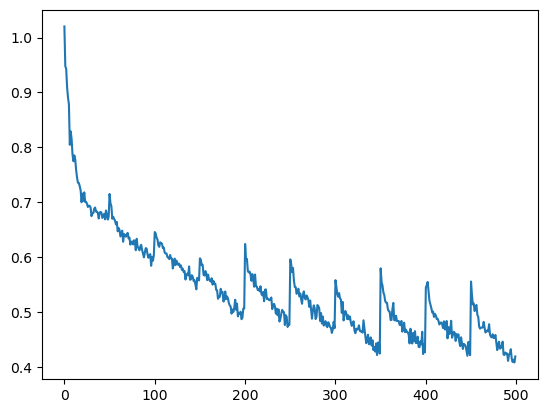

In [36]:
plt.plot(loss)

In [37]:
super_duper_loss.append(loss)

In [38]:
model_2.evaluate(x_test, y_test)

79/79 [==============================] - 1s 6ms/step - loss: 0.5521 - accuracy: 0.7400


[0.5521016716957092, 0.7400000095367432]